# tf.data 모듈
- 데이터 입력 파이프라인을 위한 모듈
    - 모델 학습/평가를 위한 대용량 데이터셋을 제공(feeding)하기 위한 모듈
    - raw dataset 에서 입력을 위한 **전처리**, **배치 크키**, **shuffling**등을 한번에 처리할 수 있게 한다.
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스들을 제공
    - 입력 소스의 제공 형태에 따라 다양한 방식을 제공

## Dataset API 사용
1. **Dataset 생성**
    - raw dataset을 지정 (Loading)
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스등를 사용해 메모리나 파일에 있는 데이터를 Dataset으로 만든다.
    - **from_tensor_slices()**: 메모리의 리스트, 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.

2. **제공 데이터 전처리**
    - **map(함수)**: 하나 하나의 데이터를 변환
        - 함수: 값을 변환할 함수로 입력데이터셋의 개수만큼 매개변수 선언
    - **filter(함수)**: 특정 조건의 데이터만 제공하도록 처리.
        - 함수: 제공할 값의 조건을 정의한 함수로 입력데이터셋의 개수만큼 매개변수 선언하고 bool 값을 반환.

In [1]:
def a():
    l = [1,2,3]
    for i in l:
        yield i

In [2]:
g = a()
next(g)

1

In [3]:
next(g)

2

3. **데이터 제공 설정 관련**
    - **batch(size)**: 학습/평가시 한번에 제공할 batch size 지정
        - size: int. batch size 지정
        - drop_remainder: bool. True일 경우 마지막 제공시 남은 데이터수가 batch size보다 작으면 제공하지 않는다.
    - **shuffle(buffer 크기)**: dataset의 원소들의 순서를 섞는다. 
        - buffer 크기: int. buffer 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.
        - 데이터 사이즈가 너무 커서 메모리가 부족할 경우 버퍼크기를 적게 준다.
        - 메모리가 충분하다면 데이터의 개수와 동일하게 주면된다.
    - **repeat(count)**: 전체 데이터를 한번 다 제공한 뒤 다시 데이터를 제공한다.
        - count: 몇번 제공할지 반복 횟수
        - shuffle이 적용된 Dataset의 경우 다음 반복 제공마다 shuffle을 진행한다. (에폭단위)
        

- 각 tf.data 함수들은 각 기능에 맞게 데이터를 처리하는 Dataset 객체를 반환한다.

### Dataset 메소드
- take(개수): 지정한 개수만큼의 데이터만 제공한다.

In [4]:
import tensorflow as tf
import numpy as np

In [5]:
tf.__version__

'2.9.1'

##### Tensor
- TensorFlow의 기본 data type. 
- numpy가 ndarray를 이용해 데이터를 관리하듯이 tensorflow를 Tensor를 이용해 데이터를 관리한다.
    - Tesorflow의 모델이 학습, 평가할때 사용하는 데이터셋(train dataset, validation dataset, test dataset)은 tf.Tensor 타입이어야 한다.
        - 학습/평가(model.fit(), model.evaluate()) 할때 ndarray를 입력 데이터셋으로 넣어주면 내부적으로 tf.Tensor로 변형해서 처리.
        - tf.Tensor는 데이터셋을 ndarray로 가지고 있다.

In [6]:
t = tf.constant([1,2,3], dtype="float32")
t

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [7]:
# tensor=>numpy 변환
a = t.numpy()  #Tensor객체.numpy()
a

array([1., 2., 3.], dtype=float32)

In [8]:
# numpy/list => tensor 변환
t2 = tf.constant(a)
t2

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [9]:
# numpy/list => tensor 변환
t3 = tf.convert_to_tensor(a)
t3

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

## Dataset 예제

In [10]:
raw_data1 = np.arange(10)
raw_data1  # ndarray -> 메모리

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
# 메모리에 있는 ndarray(Tensor)들을 읽어 들이는 Dataset을 생성. Dataset.from_tesnsor_slices(변수) 클래스 메소드를 사용.

dataset = tf.data.Dataset.from_tensor_slices(raw_data1)
print(type(dataset))
# model.fit(dataset)
# Dataset은 생성시 데이터를 읽어오거나 처리하지 않는다.
#   그 데이터셋을 사용하는 시점(모델학습, 평가)에 읽어온다. ==> Lazy 실행.

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>


In [12]:
# Dataset들은 iterable 타입 (for in 문에서 사용할 수 있다.)
# for in 문 Dataset이 가지고 있는 원소들(데이터들)을 하나씩(batch size 단위) 제공한다.
for data in dataset:
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


##### x, y 묶어서 제공
- 두개 이상의 데이터셋을 묶어서 제공할 경우 Tuple로 묶어준다.
    - Dataset이 feeding 할 때는 같은 index의 값들을 tuple로 묶어서 제공 (zip()과 동일)

In [13]:
raw_data2 = np.arange(10,20)
raw_data2

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [14]:
print(raw_data1) # 0 ~ 9
print(raw_data2) # 10 ~ 19

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]


In [15]:
dataset2 = tf.data.Dataset.from_tensor_slices((raw_data1, raw_data2)) 
# for a in dataset2:
#     print(a)  # tuple(raw_data1원소, raw_data2원소) 같은 index의 것들을 튜플로 묶어서 반환
#     break
for X, y in dataset2:  # tuple 대입
    print(X, y, sep=" ||| ")

tf.Tensor(0, shape=(), dtype=int32) ||| tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) ||| tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32) ||| tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32) ||| tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32) ||| tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32) ||| tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32) ||| tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32) ||| tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32) ||| tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32) ||| tf.Tensor(19, shape=(), dtype=int32)


In [16]:
dataset = tf.data.Dataset.from_tensor_slices(raw_data1)
dataset3 = dataset.take(2)  # 지정한 개수만큼만 조회. Dataset 값을 조회해볼때 사용.
# Pipeline: TensorSliceDataset(dataset) -- TakeDataset(dataset3)
#    dataset3이용해 값을 조회 => dataset이 데이터를 읽어오기 -> dataset3이 값을 3개까지 제공하는 기능을 제공.9  
print(type(dataset3))
for data in dataset3:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


##### shuffle

In [17]:
dataset4 = dataset.shuffle(10)  #buffer size: 10 (dataset의 원소개수와 동일 => 완전셔플)
# raw_data1 -읽기---> TensorSliceDataset(dataset) -섞기-> ShuffleDataset(dataset4)
print(type(dataset4))
for data in dataset4:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.ShuffleDataset'>
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


##### batch
- drop_remainder: boolean(기본-False)
    - batch로 제공할 데이터의 개수가 설정한 batch_size 보다 적으면 제공하지 않는다.
    - Train dataset을 만들때 True로 설정하여 항상 일정한 batch size로 학습할 수 있도록 한다. drop 되는 데이터는 다른 epoch을 반복할 때 사용된다.

In [18]:
dataset5 = dataset.batch(3)#, drop_remainder = True)
# raw_data1 --읽기-->TensorSliceDataset(dataset) -배치처리->BatchDataset(dataset5)
print(type(dataset5))
for data in dataset5:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
tf.Tensor([0 1 2], shape=(3,), dtype=int32)
tf.Tensor([3 4 5], shape=(3,), dtype=int32)
tf.Tensor([6 7 8], shape=(3,), dtype=int32)
tf.Tensor([9], shape=(1,), dtype=int32)


In [43]:
dataset6 = dataset.shuffle(10).batch(3) 
# raw_data1 --읽기-->TensorSliceDataset(dataset) -섞기->ShuffleDataset(shuffle(10))-배치처리->BatchDataset(batch(3): dataset6)
for d in dataset6:
    print(d)

tf.Tensor([8 0 9], shape=(3,), dtype=int32)
tf.Tensor([4 6 5], shape=(3,), dtype=int32)
tf.Tensor([1 3 7], shape=(3,), dtype=int32)
tf.Tensor([2], shape=(1,), dtype=int32)


##### repeat

In [20]:
dataset7 = dataset.repeat(2)  #반복횟수를 생략하면 무한제공.
# raw_data1 --읽기-->TensorSliceDataset(dataset) --데이터를반복제공-->RepeatDataset(dataset7)
print(type(dataset7))
for data in dataset7:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.RepeatDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [19]:
dataset8 = dataset.shuffle(10).batch(5).repeat(3)
for data in dataset8:
    print(data)

tf.Tensor([2 6 1 0 5], shape=(5,), dtype=int32)
tf.Tensor([8 4 3 7 9], shape=(5,), dtype=int32)
tf.Tensor([9 8 6 1 5], shape=(5,), dtype=int32)
tf.Tensor([2 7 0 4 3], shape=(5,), dtype=int32)
tf.Tensor([3 4 7 0 8], shape=(5,), dtype=int32)
tf.Tensor([1 5 9 2 6], shape=(5,), dtype=int32)


##### map

In [50]:
for i in dataset:
    print(i)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [53]:
def mapping_func(x):
#     dataset의 원소를 하나 받아서 처리하는 함수.
#     매개변수: 원소개수에 맞춰서 변수를 선언
#     반환값: 받은 원소를 처리한 값
    return x**2

dataset9 = dataset.map(mapping_func)
# raw_data1 -읽기->TensorSliceDataset(dataset) -mapping처리->MapDataset(dataset9)
print(type(dataset9))
for data in dataset9:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32)


In [54]:
for i in dataset2: # (raw_data1, raw_data2)  #dataset2가 제공하는 원소: 튜플 (x, y)
    print(i)
    
    

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=11>)
(<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=12>)
(<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=14>)
(<tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=int32, numpy=15>)
(<tf.Tensor: shape=(), dtype=int32, numpy=6>, <tf.Tensor: shape=(), dtype=int32, numpy=16>)
(<tf.Tensor: shape=(), dtype=int32, numpy=7>, <tf.Tensor: shape=(), dtype=int32, numpy=17>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=18>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=19>)


In [55]:
def mapping_func2(x, y):  # dataset2의 원소: 튜플(raw_data1원소,  raw_data2원소) -> 매개변수: 튜플대입
    # raw_data1의 세제곱한 값, y값을 처리하지 않은 값(그대로).
    return x**3, y
dataset2 = tf.data.Dataset.from_tensor_slices((raw_data1, raw_data2))
dataset10 = dataset2.map(mapping_func2)

In [57]:
for data1, data2 in dataset10:
    print(data1, data2)

tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32) tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(27, shape=(), dtype=int32) tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32) tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(125, shape=(), dtype=int32) tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(216, shape=(), dtype=int32) tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(343, shape=(), dtype=int32) tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(512, shape=(), dtype=int32) tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(729, shape=(), dtype=int32) tf.Tensor(19, shape=(), dtype=int32)


In [58]:
# 함수 대신 lambda 식
dataset11 = dataset.map(lambda x: x**2)
for data in dataset11:
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32)


In [60]:
dataset12 = dataset2.map(lambda x, y: (x**3, y**2))
for data in dataset12:
    print(data)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=100>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=121>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=144>)
(<tf.Tensor: shape=(), dtype=int32, numpy=27>, <tf.Tensor: shape=(), dtype=int32, numpy=169>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=196>)
(<tf.Tensor: shape=(), dtype=int32, numpy=125>, <tf.Tensor: shape=(), dtype=int32, numpy=225>)
(<tf.Tensor: shape=(), dtype=int32, numpy=216>, <tf.Tensor: shape=(), dtype=int32, numpy=256>)
(<tf.Tensor: shape=(), dtype=int32, numpy=343>, <tf.Tensor: shape=(), dtype=int32, numpy=289>)
(<tf.Tensor: shape=(), dtype=int32, numpy=512>, <tf.Tensor: shape=(), dtype=int32, numpy=324>)
(<tf.Tensor: shape=(), dtype=int32, numpy=729>, <tf.Tensor: shape=(), dtype=int32, numpy=361>)


##### filter

In [63]:
filter_func(9)

False

In [64]:
def filter_func(x):
#     filter 함수: 제공할 데이터의 조건 정의. 이 조건을 만족하는(True)인 원소들만 모델에 제공(feeding)
#  매개변수: Dataset으로 부터 원소를 받을 변수
#  반환: bool 
    return x%2 == 0 #2의 배수인지 여부

dataset13 = dataset.filter(filter_func)
# raw_data1 -읽기->TensorSliceDataset(dataset) -filter처리->FilterDataset(dataset13)

print(type(dataset13))

<class 'tensorflow.python.data.ops.dataset_ops.FilterDataset'>


In [65]:
for i in dataset13:
    print(i)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


In [66]:
dataset14 = dataset.filter(lambda x : x > 5)  #조건: 5초과하는 값
for data in dataset14:
    print(data)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


##### 종합

In [89]:
raw_data = np.arange(-10,11)
# raw_data(-10~10:ndarray) -읽기->       TensorSliceDataset 
#                          -filter처리-> FilterDataset
#                          -map처리 ---> MapDataset
#                          -섞기-------> ShuffleDataset
#                          -배치처리---> BatchDataset  (dataset_final)
dataset_final = tf.data.Dataset.from_tensor_slices(raw_data)\
                               .filter(lambda x:x>=0)\
                               .map(lambda y:y+10)\
                               .shuffle(raw_data.size)\
                               .batch(3)

IndentationError: unexpected indent (880735383.py, line 8)

In [88]:
for data in dataset_final:
    print(data)

tf.Tensor([10 13 20], shape=(3,), dtype=int32)
tf.Tensor([12 14 11], shape=(3,), dtype=int32)
tf.Tensor([18 15 16], shape=(3,), dtype=int32)
tf.Tensor([17 19], shape=(2,), dtype=int32)


# 문제 유형별 MLP 네트워크
- Multi Layer Perceptron (Deep Neural Network - DNN)
    - Fully Connected Layer(Dense Layer)로 구성된 네트워크
        - 모든 입력 Feature에 가중합을 계산해서 처리하는 Node(Unit, Neuron)들로 구성된 Layer

# Regression(회귀)

## Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율
<br><br>
- **Target**
    - MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [90]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

# Layer 클래스들을 제공하는 모듈
from tensorflow.keras import layers

In [ ]:
# random seed 설정.
np.random.seed(0)  #넘파이(dataset) random seed
tf.random.set_seed(0) # Tensorflow(모델) random seed

##### 데이터 로딩

In [91]:
# keras 제공 Boston dataset loading
(train_X, train_y), (test_X, test_y) = keras.datasets.boston_housing.load_data()
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

57026/57026 [==============================] - 0s 0us/step
(404, 13) (102, 13)
(404,) (102,)


In [92]:
train_X[:5]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 8.01000e+00],
       [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91430e+02, 1.46500e+01]])

In [93]:
train_y[:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

##### 하이퍼파라미터, 변수 정의

In [94]:
# 하이퍼파라미터 - 튜닝대상 (변경될 가능이 높은 변수) => 한군데 몰아서 선언하는 것이 좋다.
LEARNING_RATE = 0.001  # 학습률
N_EPOCHS  = 200        # epoch수: traindataset을 몇번 학습할지 횟수.
N_BATCHS = 32          # batch size: 1 step당 몇개의 데이터를 학습할지 (2의 거듭제곱한 값)

# 사용할 변수를 미리선언
N_TRAIN = train_X.shape[0]  # train data의 개수
N_TEST = test_X.shape[0]    # test data의 개수

##### X, y 전처리
- MLP는 선형모델을 기반으로 하므로 Feature scaling을 해준다.

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)

##### Dataset 생성

In [ ]:
model.fit(train-dataset)

In [98]:
# train set을 위한 dataset을 생성

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, train_y))\
                                .shuffle(N_TRAIN)\
                                .batch(N_BATCHS, drop_remainder=True)  
            #(X_train, y_train)을 묶어서 제공.
            # shuffle -> epoch단위로 shuffle을 실행.
            # batch size설정. Train set 에서는 보통 drop_remainder=True로 설정. 각 step마다 동일 개수의 데이터셋을 학습하도록 하기 위해.

# validation dataset -> 학습하는 도중에 검증데이터로 사용할 dataset (생략)
    
# 최종 평가시 사용할 데이터셋
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, test_y)).batch(N_BATCHS) 
# test set의 batch_size : 전체 데이터를 묶어서 검증하는 것이 아니라 batch_size 개수별로 검증해서 그 평균을 최종 평가 결과로 반환.

##### 모델 구현
1. 모델을 생성 - Sequential 방식
2. 모델에 Layer를 순서대로 추가
    - Input Layer
    - Hidden Layer 들 (layer의 unit수, layer의 개수 => 튜닝대상 (개수가 많을 수록 복잡한 모델-overfitting발생할 수 있다.) 
    - Output Layer
    
3. 학습을 위해서 compile

In [99]:
X_train.shape

(404, 13)

In [101]:
def create_housing_model():
    
    model = keras.Sequential()
#     1. Input Layer
#     model.add(layers.InputLayer((13, )))  #Input Layer 추가 1. -> InputLayer생성=>Feature shape을 지정
# Input Layer 추가 2 -> 첫번째 hidden layer추가하면서 input_shape 속성에 Feature에 shape을 지정
    
#     2. Hidden layer 추가.
#  DenseLayer: units - unit의 개수, activation: 활성함수
#  DenseLayer의 unit수는 점점 개수를 줄여나간다.(관례적으로), 
    model.add(layers.Dense(units=128, activation='relu', input_shape=(13,))) 
    model.add(layers.Dense(units=64, activation='relu'))
    model.add(layers.Dense(units=32, activation='relu'))
    model.add(layers.Dense(units=16, activation='relu'))
    
#     3. Output Layer 추가
#    회귀문제에대한 output layer  - units: 추론한 결과값(정답)에 개수에 맞춘다. - 집값1개 (unit=1), activation=None(기본): 지정하지 않는다.
    model.add(layers.Dense(units=1))
    
    return model

In [102]:
def create_housing_model2():
#     모델에 추가할 layer들을 리스트로 묶어서 Sequential 생성할때 넣어준다.
    model = keras.Sequential([
        layers.Dense(units=128, activation='relu', input_shape=(13,)),
        layers.Dense(units=64, activation='relu'),
        layers.Dense(units=32, activation='relu'),
        layers.Dense(units=16, activation='relu'),
        layers.Dense(units=1)        
    ])
    return model

In [130]:
# 모델생성
model = create_housing_model()

# 모델 컴파일 - 모델을 학습할 수 있게 만들어 준다. => 모델에 optimizer와 loss함수를 추가.
# 회귀문제를 위한 모델 컴파일 -> loss: mse(mean squared error)
# optimizer=옵티마이저 객체-learning rate등 설정을 할경우., 문자열-기본설정을 사용할 경우. ("adam")
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='mse')

In [107]:
# weight = 입력 features수 * unit 수
# bias = unit수
# layer의 파라미터수: weight + bias

w = 13 * 128
b = 128
p = w + b
p

1792

In [108]:
128*64 + 64

8256

In [104]:
# 생성된 모델의 구조를 확인.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


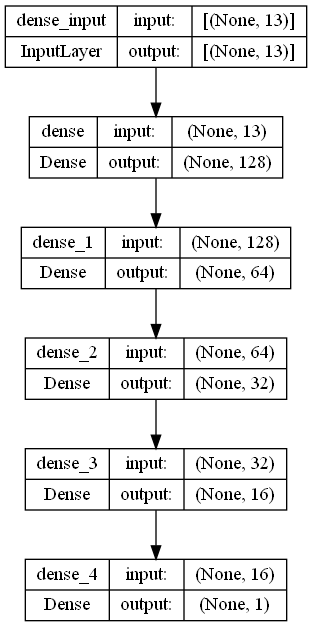

In [111]:
# keras.utils.plot_model(model)  # 모델의 구조를 graphviz를 이용해서 시각화. -> 파일로 저장 (model.png)
# keras.utils.plot_model(model, show_shapes=True) # 각 layer의 input shape과 output shape을 같이 시각화
keras.utils.plot_model(model, show_shapes=True, to_file='housing_model.png')  #to_file: 저장 파일경로 지정.

##### 학습(Train)

In [132]:
# 모델.fit() : 반환 - History: 학습한 내역(epoch별 검증결과)를 묶어서 제공.
hist = model.fit(train_dataset,   # train dataset(tf.data- batch+shuffle) - (X, y)
                 epochs=N_EPOCHS, # epoch 수
                 validation_data=test_dataset)  # validation dataset(tf.data) 제공 (X, y)
# Dataset을 이용해서 학습할 경우 validatation_split을 사용할 수 없다.

Epoch 1/200
12/12 [==============================] - 0s 7ms/step - loss: 1.4397 - val_loss: 12.0301
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 1.4585 - val_loss: 11.7503
Epoch 3/200
12/12 [==============================] - 0s 8ms/step - loss: 1.4240 - val_loss: 11.5121
Epoch 4/200
12/12 [==============================] - 0s 7ms/step - loss: 1.2589 - val_loss: 12.0681
Epoch 5/200
12/12 [==============================] - 0s 7ms/step - loss: 1.3494 - val_loss: 11.6067
Epoch 6/200
12/12 [==============================] - 0s 9ms/step - loss: 1.3422 - val_loss: 11.3388
Epoch 7/200
12/12 [==============================] - 0s 7ms/step - loss: 1.3011 - val_loss: 11.8777
Epoch 8/200
12/12 [==============================] - 0s 9ms/step - loss: 1.3690 - val_loss: 12.2248
Epoch 9/200
12/12 [==============================] - 0s 8ms/step - loss: 1.5797 - val_loss: 11.6914
Epoch 10/200
12/12 [==============================] - 0s 9ms/step - loss: 1.7653 - val_loss: 11.8603

12/12 [==============================] - 0s 7ms/step - loss: 0.4358 - val_loss: 13.4941
Epoch 162/200
12/12 [==============================] - 0s 10ms/step - loss: 0.4419 - val_loss: 13.1140
Epoch 163/200
12/12 [==============================] - 0s 5ms/step - loss: 0.5128 - val_loss: 13.6237
Epoch 164/200
12/12 [==============================] - 0s 4ms/step - loss: 0.5436 - val_loss: 13.2722
Epoch 165/200
12/12 [==============================] - 0s 6ms/step - loss: 0.4754 - val_loss: 13.1696
Epoch 166/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6656 - val_loss: 13.7248
Epoch 167/200
12/12 [==============================] - 0s 10ms/step - loss: 0.5925 - val_loss: 13.5950
Epoch 168/200
12/12 [==============================] - 0s 9ms/step - loss: 0.6685 - val_loss: 12.9268
Epoch 169/200
12/12 [==============================] - 0s 8ms/step - loss: 0.6423 - val_loss: 13.0590
Epoch 170/200
12/12 [==============================] - 0s 8ms/step - loss: 0.6701 - val_loss: 

In [118]:
print(type(hist.history))
hist.history

<class 'dict'>


{'loss': [573.97265625,
  529.7014770507812,
  415.3443603515625,
  200.0448455810547,
  68.7126693725586,
  38.21321487426758,
  27.730417251586914,
  22.855295181274414,
  20.93318748474121,
  18.496910095214844,
  17.71816635131836,
  16.5079288482666,
  15.492290496826172,
  14.740364074707031,
  13.879814147949219,
  13.086426734924316,
  12.376360893249512,
  12.186575889587402,
  11.21507740020752,
  11.498808860778809,
  10.811851501464844,
  8.988255500793457,
  10.814922332763672,
  9.931567192077637,
  10.078068733215332,
  10.08855152130127,
  10.221027374267578,
  10.3018217086792,
  9.47790813446045,
  9.315930366516113,
  9.265284538269043,
  8.851627349853516,
  8.8947172164917,
  8.93535327911377,
  8.705267906188965,
  8.43432331085205,
  8.180105209350586,
  8.32833194732666,
  8.184794425964355,
  8.188965797424316,
  8.259322166442871,
  8.044373512268066,
  7.290256977081299,
  8.022368431091309,
  7.801860809326172,
  6.882209777832031,
  7.805867671966553,
  7.3

##### 결과 시각화

In [119]:
import matplotlib.pyplot as plt

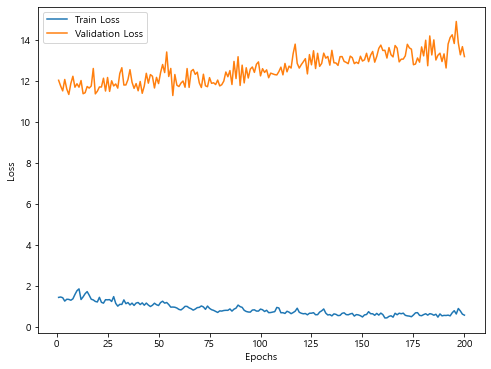

In [133]:
plt.figure(figsize=(8,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

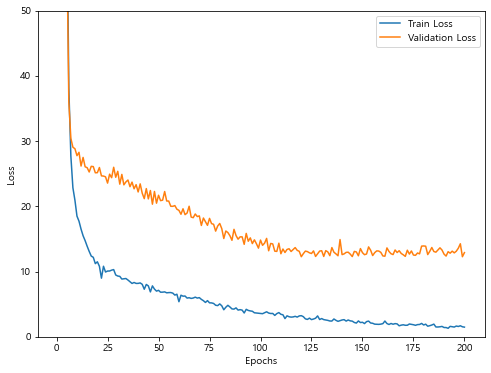

In [121]:
plt.figure(figsize=(8,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')

plt.ylim(0,50)  #y축 값의 범위를 제한

plt.legend()
plt.show()

##### 최종 테스트

In [134]:
loss = model.evaluate(test_dataset)
print(loss, np.sqrt(loss))

4/4 [==============================] - 0s 3ms/step - loss: 13.1856
13.185626029968262 3.631201733581909


##### 모델 네트워크 저장

In [124]:
model.save('models/boston_hosing_model')

INFO:tensorflow:Assets written to: models/boston_hosing_model\assets


##### 새로운 데이터 추론

In [125]:
new_data = X_test[:5]
new_data.shape

(5, 13)

In [127]:
# model.predict(추론한 Feature): 추론결과
pred = model.predict(new_data)

1/1 [==============================] - 0s 184ms/step


In [128]:
 pred

array([[ 7.6359487],
       [18.099798 ],
       [19.894531 ],
       [34.950897 ],
       [23.554142 ]], dtype=float32)

In [129]:
test_y[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

# 분류 (Classification)

## Fashion MNIST Dataset - 다중분류(Multi-Class Classification) 문제

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

이미지는 28x28 크기이며 Gray scale이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)들이다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
class_names = np.array(['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

##### Data 로딩

In [ ]:
(train_image, train_label), (test_image, test_label) = keras.datasets.fashion_mnist.load_data()

##### validata set  생성

In [ ]:
from sklearn.model_selection import train_test_split
train_image, val_image, train_label, val_label = train_test_split(train_image, train_label, test_size=0.2, stratify=train_label, random_state=0)

##### 이미지 확인

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_image[i], cmap="Greys")
    plt.xlabel(class_names[train_label[i]])

plt.tight_layout()
plt.show()

#### 하이퍼파라미터, 변수 설정

In [ ]:
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

N_TRAIN = train_image.shape[0]
N_VAL = val_image.shape[0]
N_TEST = test_image.shape[0]

#### X, y  전처리
- y값 처리
    - 다중 분류에서 label encoding 형식의 label을 one hot encoding 처리

In [ ]:
y_train = keras.utils.to_categorical(train_label)
y_val = keras.utils.to_categorical(val_label)
y_test = keras.utils.to_categorical(test_label)
print(y_train.shape, y_val.shape, y_test.shape)

- x값(이미지) 처리
    - dtype을 uint8에서 float32로 변환한다.
    - 0 ~ 1 정규화. X/255.0으로 나눈다.
    

In [ ]:
X_train = train_image.astype(np.float32)
X_val = val_image.astype(np.float32)
X_test = test_image.astype(np.float32)

##### Dataset 생성

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .map(lambda x, y : (x/255, y))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).map(lambda x, y:(x/255, y)).batch(N_BATCHS)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).map(lambda x, y:(x/255, y)).batch(N_BATCHS)

In [ ]:
X_train.shape

##### 모델 생성 및 컴파일

In [ ]:
def create_fashionmnist_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=64, activation='relu'))
    
    model.add(layers.Dense(units=10, activation='softmax'))
    
    return model

In [ ]:
model = create_fashionmnist_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
keras.utils.plot_model(model, show_shapes=True, to_file='fashion_mnist_model.png')

##### Train(학습)

In [ ]:
hist = model.fit(train_dataset,
                 epochs=N_EPOCHS,
                 validation_data=val_dataset)

##### 결과 시각화

In [ ]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='validation loss')
plt.title("LOSS", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['accuracy'], label='train accuracy')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_accuracy'], label='validation accuracy')
plt.title("Accuracy", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 최종평가

In [ ]:
loss, accuracy = model.evaluate(test_dataset)

In [ ]:
print(loss, accuracy)

####  모델저장

In [ ]:
model.save('models/fashion_mnist_model')

#### 새로운 데이터 추론

In [ ]:
new_input = X_test[:5]
new_input = new_input/255.0

In [ ]:
pred = model.predict(new_input)
pred[0]

In [ ]:
pred_class = np.argmax(pred, axis=-1)
pred_class

In [ ]:
test_label[:5]

In [ ]:
pred_class_name = class_names[pred_class]
pred_class_name

In [ ]:
pred_proba = np.max(pred, axis=-1)
pred_proba

In [ ]:
for idx, (name, proba) in enumerate(zip()):
    print(f"{idx}. {name}: {proba:.4f}")

## 위스콘신 유방암 데이터셋 - 이진분류(Binary Classification) 문제

- **이진 분류 문제 처리 모델의 두가지 방법**
    1. positive(1)일 확률을 출력하도록 구현
    2. negative(0)일 확률과 positive(1)일 확률을 출력하도록 구현 => 다중분류 처리 방식으로 해결
    

- 위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
- Feature
    - 종양에 대한 다양한 측정값들
- Target의 class
    - 0 - malignant(악성종양)
    - 1 - benign(양성종양)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(0)
tf.random.set_seed(0)

##### 데이터 로딩, train/validation/test set 나누기

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

X_train.shape, X_val.shape, X_test.shape

In [ ]:
X_train[:3]

In [ ]:
y_train[:3]

#### 하이퍼파라미터, 변수 정의

In [ ]:
LEARNING_RATE = 0.001
N_EPOCHS = 150
N_BATCHS = 50

N_TRAIN = X_train.shape[0]
N_VAL = X_val.shape[0]
N_TEST = X_test.shape[0]

#### 데이터 전처리
- 이진 분류
    - 출력 레이어의 unit을 1개, activation 함수를 sigmoid를 사용하는 경우(1일 확률) => y:그대로 사용
    - 출력 레이어의 unit을 2개, activation 함수를 sofmax를 사용하는 경우(0일 확률, 1일 확률) - 다중분류와 동일하게 구현 => y: one hot encoding
- X: 테이블데이터
    - 문자열(범주형): one hot encoding
    - 연속형(수치형): feature scaling

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### Dataset 생성

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

#### model 생성, 컴파일

In [ ]:
def create_wisconsin_model():
    model = keras.Sequential()
    model.add(layers.Dense(units=32, activation='relu', input_shape=(30, )))
    model.add(layers.Dense(units=16, activation='relu'))
    model.add(layers.Dense(units=8, activation='relu'))
    
    model.add(layers.Dense(units=1, activation='sigmoid', name='Output_layer'))
    
    return model

In [ ]:
model = create_wisconsin_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
keras.utils.plot_model(model, show_shapes=True, to_file='cancer_model.png')

#### Train(학습)

In [ ]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=val_dataset)

#### 결과 시각화

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.title('Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 최종평가

In [ ]:
loss, acc = model.evaluate(test_dataset)

In [ ]:
print(loss, acc)

#### 모델저장

In [ ]:
model.save('models/breast_cancer_model')

#### 새로운 데이터 추론

In [ ]:
new_data = X_test[:5]
new_data_scaled = scaler.transform(new_data)

In [ ]:
pred = model.predict(new_data_scaled)

In [ ]:
pred

In [ ]:
threshold = 0.5
result = (pred > threshold).astype(np.int8)
result

In [ ]:
result_label = np.where(pred > threshold, "양성-1", "악성-0")
result_label

# Tensorflow 2.3이하 버전에서 Train dataset 구성 및 학습 
- 위의 코드들은 2.4 이후 버전
- 2.3 이하버전에서는 
    1. train_dataset 구성시 repeat()를 추가
    2. 학습시에 train/validation 1 epoch당 step 횟수를 추가
        - steps_per_epoch: train set 에 대한 step 횟수
        - validation_steps: validation set 에 대한 step 횟수

In [ ]:
train_dataset2 = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()

val_dataset2 = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)
test_dataset2 = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

In [ ]:
steps_per_epoch = N_TRAIN // N_BATCHS #repeat() 때문에 len()을 사용못함
validation_steps = len(val_dataset2) #len(Dataset): step수 반환
print(steps_per_epoch, validation_steps)

In [ ]:
model = create_wisconsin_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_dataset2, 
          steps_per_epoch=steps_per_epoch,
          validation_data=val_dataset2,
          validation_steps=validation_steps, 
          epochs=10)